# 1. Выбор датасета
Был выбран датасет [114000 Spotify Songs](https://www.kaggle.com/datasets/priyamchoksi/spotify-dataset-114k-songs), содержащий информацию о треках, доступных на платформе Spotify. Этот датасет подходит для анализа музыкальных предпочтений и характеристик треков.

# 2. Описание датасета

**Предметная область:**  
Музыкальные треки, аудиоаналитика, стриминговая музыка.

**Источник данных:**  
Датасет размещён на Kaggle — [114000 Spotify Songs](https://www.kaggle.com/datasets/priyamchoksi/spotify-dataset-114k-songs).  
Данные получены из **Spotify API** и содержат метаданные и аудио-признаки треков.

**Характер данных:**  
- Реальные данные
- Включают как текстовые метаданные (название, исполнители, жанр), так и числовые аудиофичи (темп, громкость, танцевальность и др.)

### Атрибуты датасета

Датасет содержит около **114 000 треков** и **20 атрибутов**.

### Категориальные и текстовые атрибуты
- `track_id` — **строка**. Идентификатор трека в Spotify.
- `artists` — **строка**. Имена артистов, исполнивших трек. Если артистов больше одного, они разделены символом `;`.
- `album_name` — **строка**. Название альбома, в котором представлен трек.
- `track_name` — **строка**. Название трека.
- `explicit` — **булево** (`true`/`false`). Присутствуют ли в треке эксплицитные тексты (нецензурная лексика): `true` — да, `false` — нет или неизвестно.
- `track_genre` — **строка**. Жанр, к которому относится трек.

### Числовые атрибуты
- `popularity` — **целое число (0–100)**. Показатель популярности трека на Spotify. 100 соответствует максимальной популярности. Рассчитывается на основе количества прослушиваний и интереса пользователей.
- `duration_ms` — **целое число**. Длительность трека в миллисекундах.
- `danceability` — **вещественное число от 0.0 до 0.98**. «Танцевальность» описывает, насколько трек подходит для танцев, на основе сочетания музыкальных элементов.
- `energy` — **вещественное число от 0.0 до 1.0**. Перцептивная мера интенсивности и активности. Энергичные треки кажутся быстрыми, громкими и «шумными».
- `key` — **целое число от 0 до 11** (тональность трека). Целые числа сопоставляются с высотой звука с использованием стандартной нотации Pitch Class. Например, `0 = C (До)`, `1 = C♯/D♭ (До♯/Ре♭)`, `2 = D (Ре)` и так далее.
- `loudness` — **вещественное число**. Общая громкость трека в децибелах (dB).
- `mode` — **категориальный признак в виде целого числа**. Указывает лад (тип звукоряда): мажор представлен значением `1`, минор — `0`.
- `speechiness` — **вещественное число от 0.0 до 1.0**. Обнаружение присутствия речи в треке. Значения **выше 0.66** описывают треки, состоящие преимущественно из речи.
- `acousticness` — **вещественное число от 0.0 до 1.0**. Мера уверенности в том, что трек акустический.
- `instrumentalness` — **вещественное число от 0.0 до 1.0**. Прогнозирует, что в треке **нет вокала**. Чем ближе значение к `1.0`, тем выше вероятность отсутствия вокального контента.
- `liveness` — **вещественное число от 0.0 до 1.0**. Обнаруживает присутствие аудитории в записи. Значение **выше 0.8** указывает на концертную запись.
- `valence` — **вещественное число от 0.0 до 1.0**. Описывает «музыкальную позитивность» (эмоциональную окраску) трека. Высокие значения — радостные треки, низкие — грустные.
- `tempo` — **вещественное число**. Оценочный общий темп трека в ударах в минуту (BPM).
- `time_signature` — **целое число**. Оценочный размер (метр), указывающее сколько долей в каждом такте. Значения от **3 до 7**.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [42]:
df = pd.read_csv('dataset.csv')

# 3. Анализ атрибутов датасета

Для каждого атрибута определяем:
1. Среднее значение и стандартное отклонение (СКО)
2. Гистограмму распределения значений и выбросы
3. Наличие пропущенных значений и их количество
4. Варианты обработки пропущенных значений

## 3.1. Среднее значение и стандартное отклонение (СКО)

Для всех числовых атрибутов вычисляем основные статистические характеристики:

In [43]:
numeric_stats = df.select_dtypes(include='number').agg(['mean', 'std']).T
numeric_stats.columns = ['Среднее', 'СКО']
print(numeric_stats.round(3))

                     Среднее         СКО
popularity            33.239      22.305
duration_ms       228029.153  107297.713
danceability           0.567       0.174
energy                 0.641       0.252
key                    5.309       3.560
loudness              -8.259       5.029
mode                   0.638       0.481
speechiness            0.085       0.106
acousticness           0.315       0.333
instrumentalness       0.156       0.310
liveness               0.214       0.190
valence                0.474       0.259
tempo                122.148      29.978
time_signature         3.904       0.433


## 3.2. Гистограмма распределения значений и определение выбросов

Для каждого числового атрибута:
- Строим гистограмму распределения
- Визуализируем boxplot для обнаружения выбросов
- Используем метод IQR (межквартильный размах) для определения границ выбросов
- Вычисляем процент выбросов от общего числа наблюдений

In [44]:
def analyze_distribution(df, column):
    data = df[column].dropna()
    
    q1, q3 = data.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = data[(data < lower) | (data > upper)]
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    ax[0].hist(data, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    ax[0].axvline(lower, color='red', linestyle='--', label='Границы выбросов')
    ax[0].axvline(upper, color='red', linestyle='--')
    ax[0].set_title(f'Распределение: {column}')
    ax[0].set_xlabel('Значение')
    ax[0].set_ylabel('Частота')
    ax[0].legend()
    
    ax[1].boxplot(data, vert=True)
    ax[1].set_title(f'Boxplot: {column}')
    ax[1].set_ylabel('Значение')
    
    plt.tight_layout()
    plt.show()
    
    print(f'Выбросов: {len(outliers)} ({len(outliers)/len(data)*100:.2f}%)')
    print(f'Границы: [{lower:.2f}, {upper:.2f}]\n')

Анализ: popularity


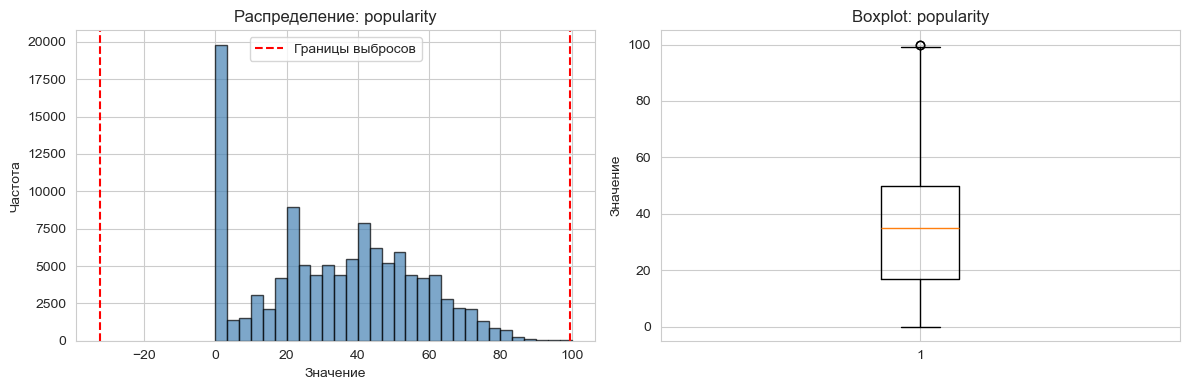

Выбросов: 2 (0.00%)
Границы: [-32.50, 99.50]

Анализ: duration_ms


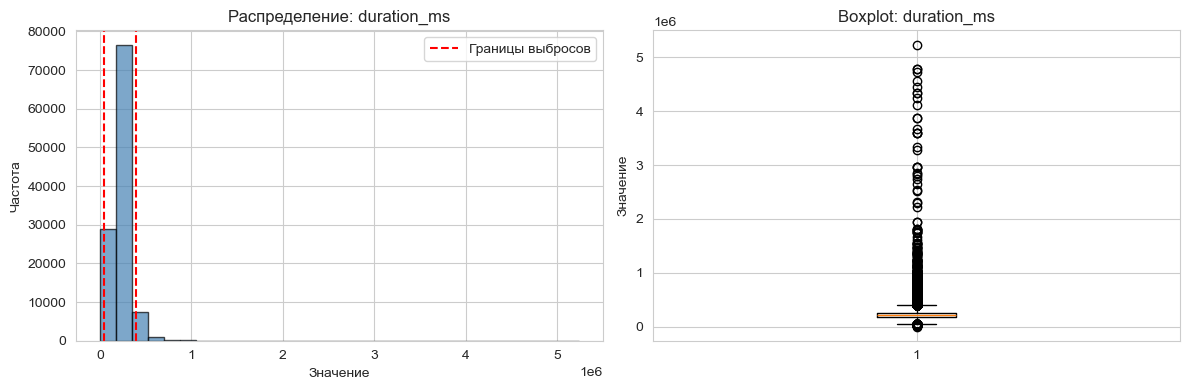

Выбросов: 5617 (4.93%)
Границы: [42906.00, 392666.00]

Анализ: danceability


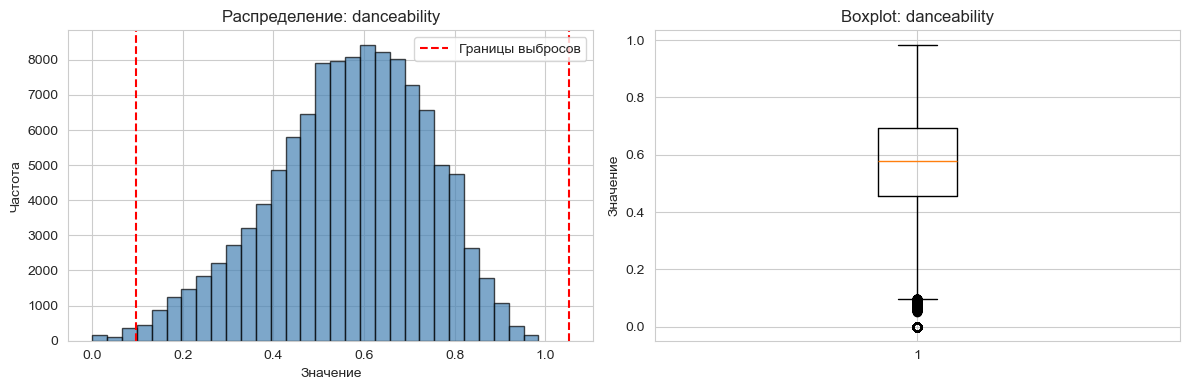

Выбросов: 620 (0.54%)
Границы: [0.10, 1.05]

Анализ: energy


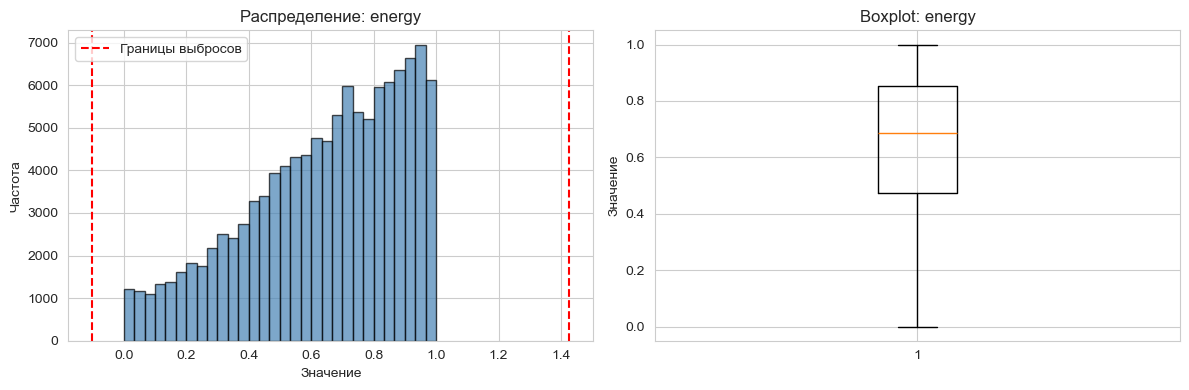

Выбросов: 0 (0.00%)
Границы: [-0.10, 1.43]

Анализ: key


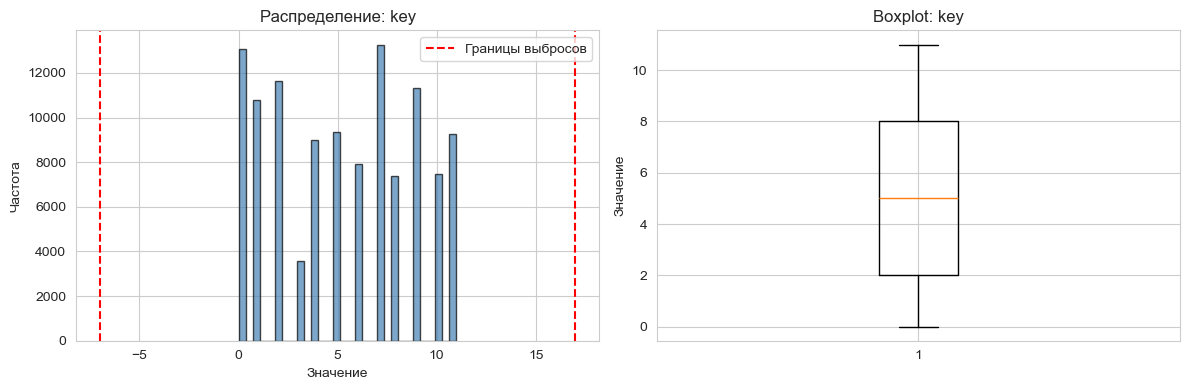

Выбросов: 0 (0.00%)
Границы: [-7.00, 17.00]

Анализ: loudness


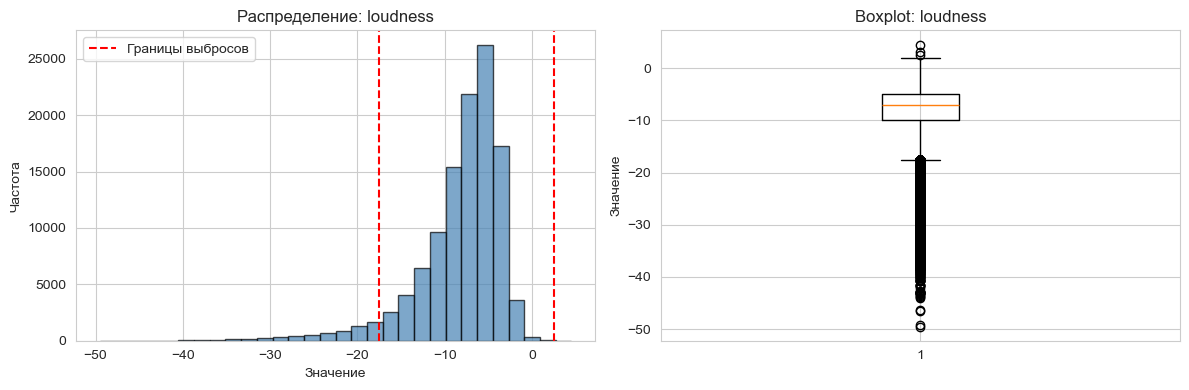

Выбросов: 6173 (5.41%)
Границы: [-17.53, 2.51]

Анализ: mode


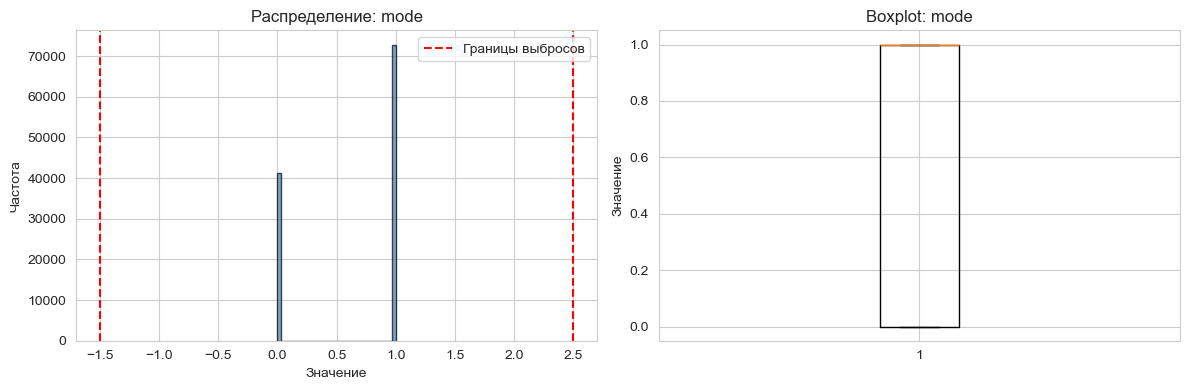

Выбросов: 0 (0.00%)
Границы: [-1.50, 2.50]

Анализ: speechiness


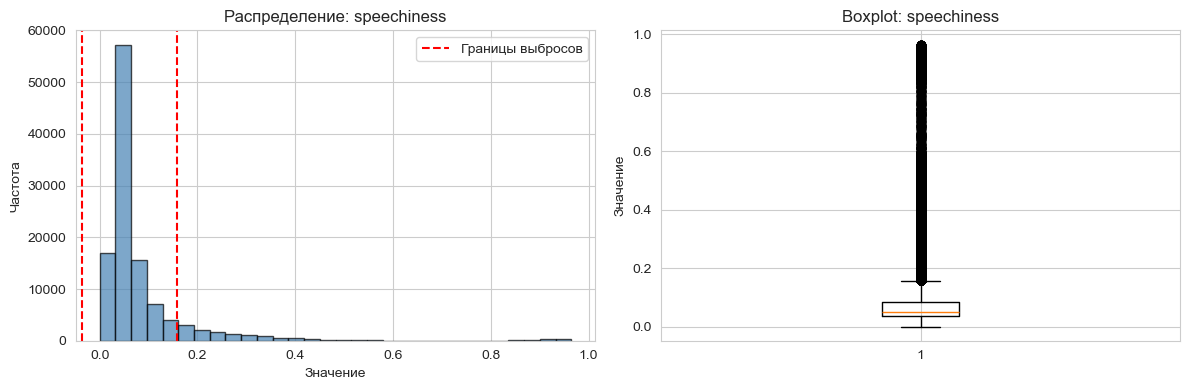

Выбросов: 13211 (11.59%)
Границы: [-0.04, 0.16]

Анализ: acousticness


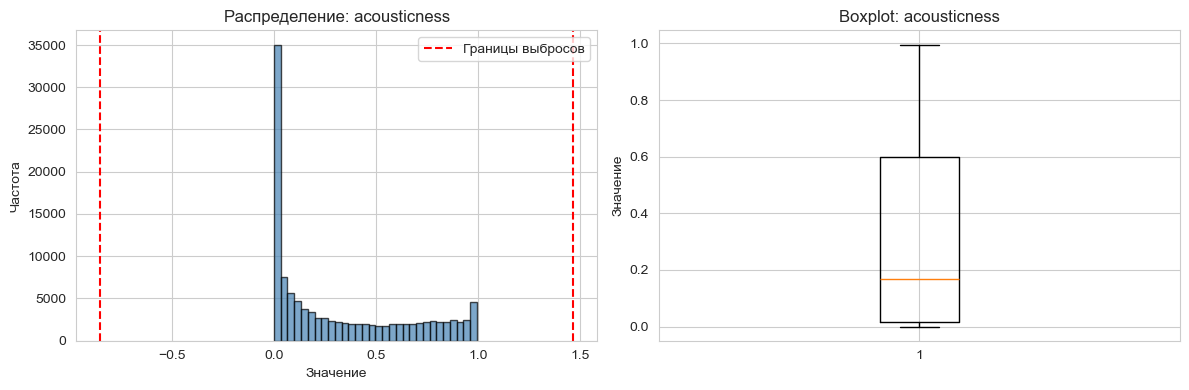

Выбросов: 0 (0.00%)
Границы: [-0.85, 1.47]

Анализ: instrumentalness


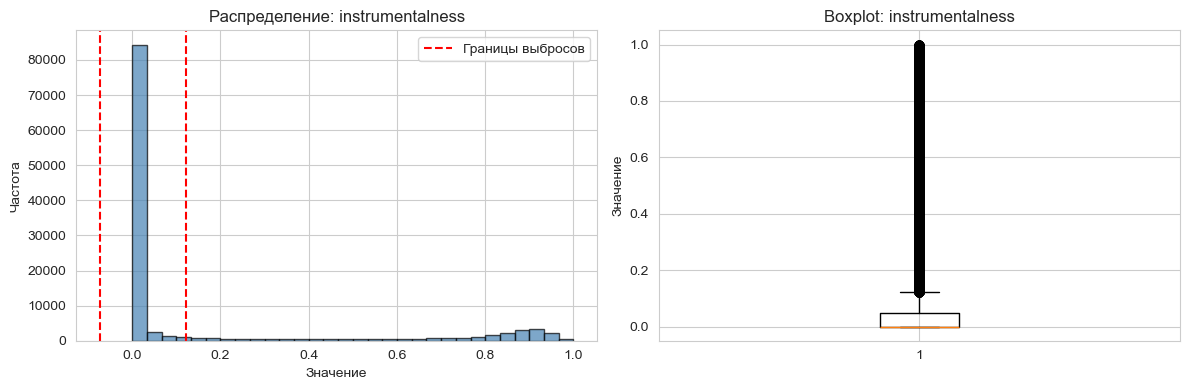

Выбросов: 25246 (22.15%)
Границы: [-0.07, 0.12]

Анализ: liveness


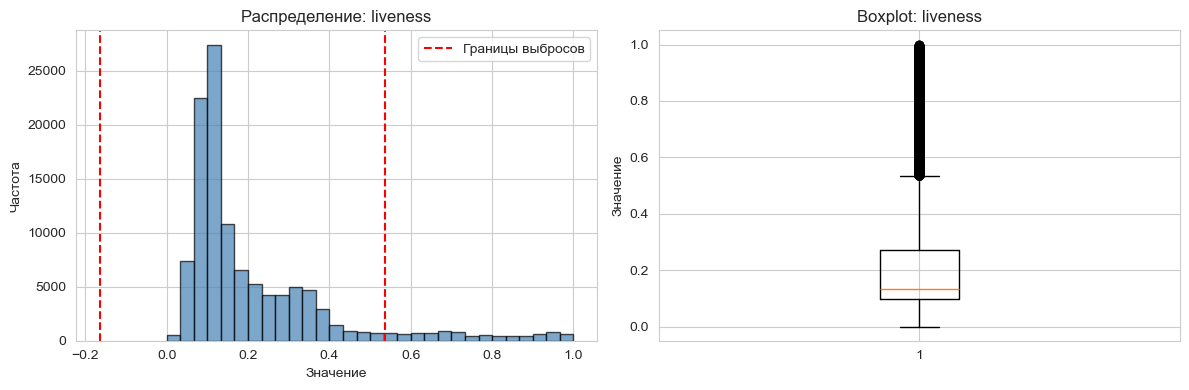

Выбросов: 8642 (7.58%)
Границы: [-0.16, 0.54]

Анализ: valence


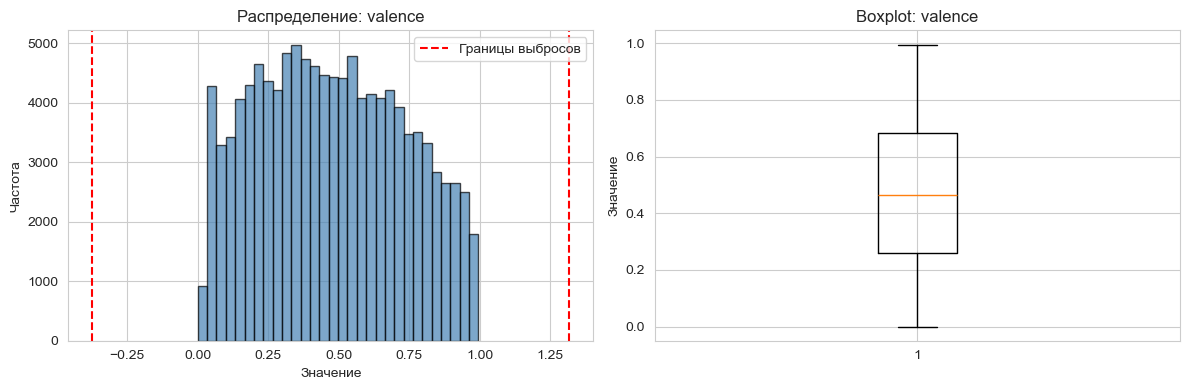

Выбросов: 0 (0.00%)
Границы: [-0.37, 1.32]

Анализ: tempo


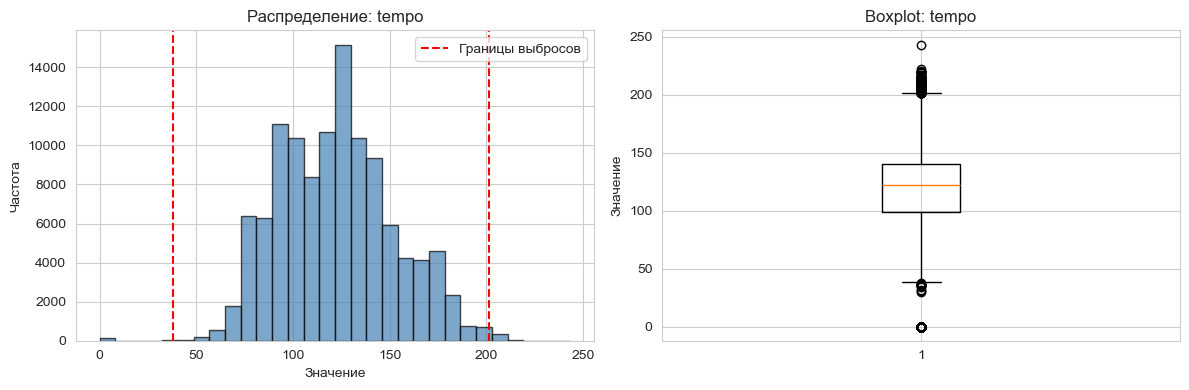

Выбросов: 617 (0.54%)
Границы: [37.94, 201.35]

Анализ: time_signature


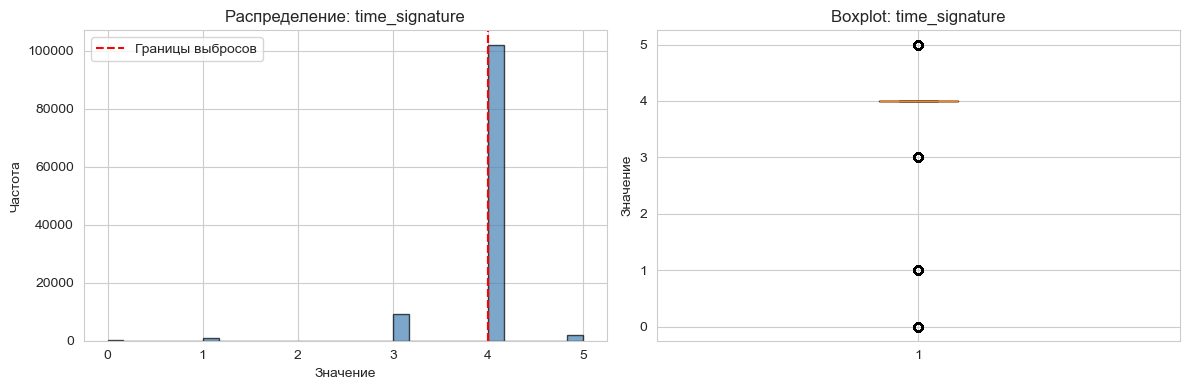

Выбросов: 12157 (10.66%)
Границы: [4.00, 4.00]



In [45]:

numeric_cols = df.select_dtypes(include=["int64", "float64"])

for col in numeric_cols:
    print(f"{'='*60}\nАнализ: {col}\n{'='*60}")
    analyze_distribution(df, col)

Большинство признаков имеет выбросы (от 0.54% до 22.15%), которые отражают естественное разнообразие музыкальных жанров (инструменталы, концертные записи, подкасты, нестандартные размеры) и не требуют удаления, а распределения `popularity`, `speechiness` и `instrumentalness` имеют правостороннее смещение, в то время как `danceability`, `energy` и `valence` близки к нормальному распределению.

## 3.3. Анализ пропущенных значений

Проверяем наличие пропущенных значений в датасете:
- Подсчитываем количество пропусков для каждого атрибута
- Вычисляем процент пропущенных значений
- Визуализируем распределение пропусков (если они есть)

In [46]:
missing = df.isnull().sum()
missing_df = pd.DataFrame({
    'Атрибут': missing.index,
    'Пропущено': missing.values,
    'Процент': (missing / len(df) * 100).round(2)
})
missing_df = missing_df[missing_df['Пропущено'] > 0].sort_values('Пропущено', ascending=False)

print("Пропущенные значения:")
print(missing_df)

missing_analysis = df.isnull().sum()
print(f"Общее количество пропущенных значений: {missing_analysis.sum()}")

Пропущенные значения:
               Атрибут  Пропущено  Процент
artists        artists          1      0.0
album_name  album_name          1      0.0
track_name  track_name          1      0.0
Общее количество пропущенных значений: 3


## 3.4. Варианты обработки пропущенных значений

**Результат анализа:** В датасете обнаружено **3 пропущенных значения**:
- `artists` — 1 пропуск (0.001%)
- `album_name` — 1 пропуск (0.001%)
- `track_name` — 1 пропуск (0.001%)

**Предложенные варианты обработки:**

Учитывая минимальное количество пропусков (менее 0.003% от всего датасета), можно применить следующие стратегии:

### Вариант 1: Заполнение значениями (рекомендуется)
**Для текстовых признаков:**
- `artists` → заполнение значением `"Unknown Artist"`
- `album_name` → заполнение значением `"Unknown Album"`
- `track_name` → заполнение значением `"Unknown Track"` или удаление строки

**Обоснование:**
- Сохраняет все данные для анализа
- Не искажает статистику по другим признакам
- Позволяет выявить треки с неполными метаданными

### Вариант 2: Удаление строк
Полностью удалить строки с пропущенными значениями (3 строки из 114 000).

**Обоснование:**
- Не влияет на качество анализа (потеря 0.003% данных)
- Гарантирует полноту данных
- Упрощает дальнейшую обработку

### Вариант 3: Анализ причины пропусков
Исследовать, почему эти конкретные треки имеют пропущенные значения (возможно, ошибка при сборе данных из API).

**Рекомендация:** Использовать **Вариант 1** для сохранения максимального объема данных, заполнив пропуски значением "Unknown" для категориальных полей.

# 4. Определение корреляции между параметрами

Анализируем взаимосвязи между числовыми атрибутами:
1. Определяем высококоррелированные атрибуты и характер корреляции
2. Выявляем атрибуты без корреляции
3. Строим графики рассеивания (матрицу pairplot)
4. Анализируем полученные результаты

## 4.1. Высококоррелированные атрибуты и характер корреляции

Используем следующие критерии для классификации корреляций:
- **Очень сильная корреляция**: |r| ≥ 0.9
- **Сильная корреляция**: 0.7 ≤ |r| < 0.9
- **Умеренная корреляция**: 0.5 ≤ |r| < 0.7
- **Слабая корреляция**: 0.3 ≤ |r| < 0.5
- **Очень слабая/отсутствует**: |r| < 0.3

Для каждой пары признаков определяем:
- Коэффициент корреляции Пирсона (r)
- Модуль коэффициента (|r|) — сила связи
- Уровень корреляции
- Направление корреляции (положительная или отрицательная)

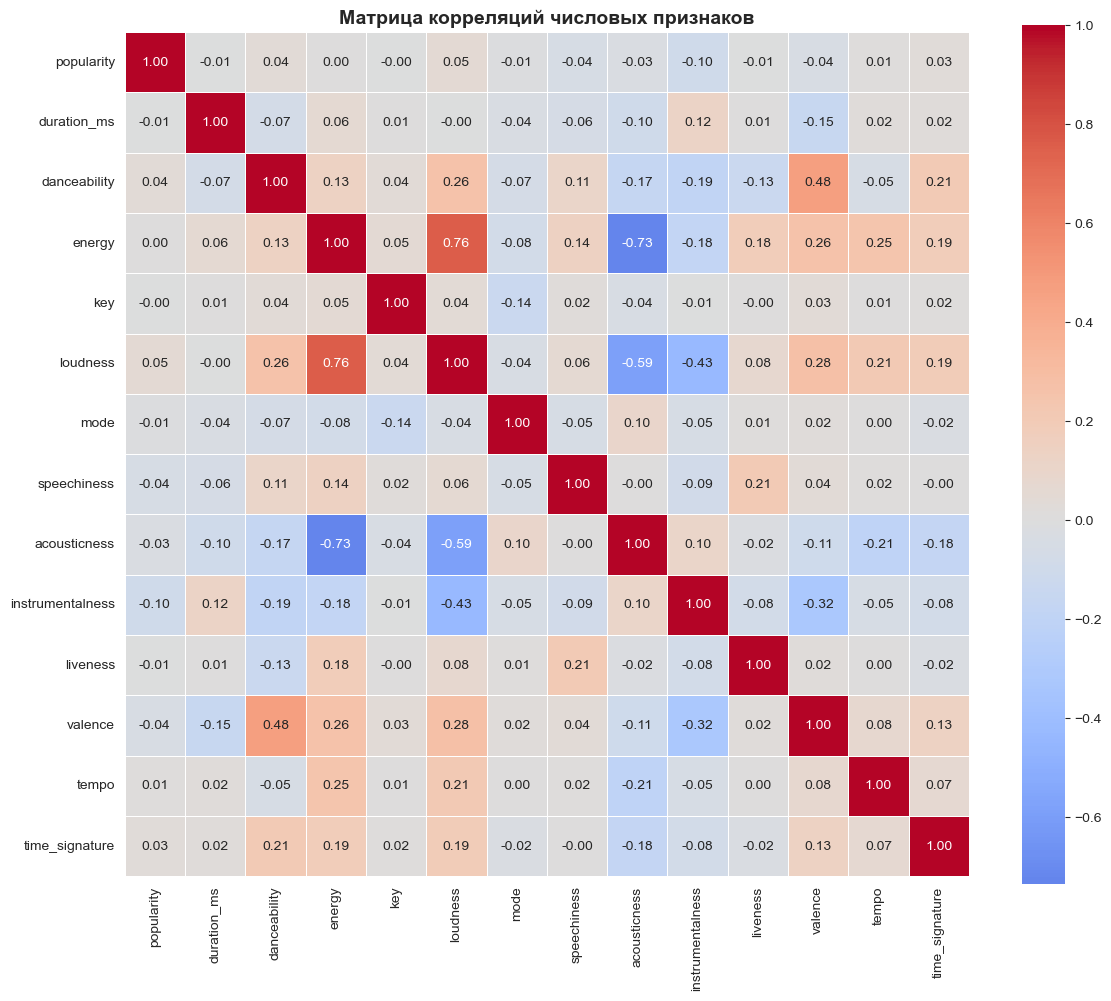


Классификация корреляций:
     Признак 1            Признак 2            Коэффициент                   Уровень                    Направление     
            energy             loudness           0.762                        Сильная (|r| >= 0.7)    Положительная    
            energy         acousticness          -0.734                        Сильная (|r| >= 0.7)    Отрицательная    
          loudness         acousticness          -0.590                      Умеренная (|r| >= 0.5)    Отрицательная    
      danceability              valence           0.477                         Слабая (|r| >= 0.3)    Положительная    
          loudness     instrumentalness          -0.433                         Слабая (|r| >= 0.3)    Отрицательная    
  instrumentalness              valence          -0.324                         Слабая (|r| >= 0.3)    Отрицательная    
          loudness              valence           0.280        Очень слабая/отсутствует (|r| < 0.3)    Положительная    
     

In [47]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5)
plt.title("Матрица корреляций числовых признаков", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

def classify_correlation(r):
    r_abs = abs(r)
    if r_abs >= 0.9:
        return 'Очень сильная (|r| >= 0.9)'
    elif r_abs >= 0.7:
        return 'Сильная (|r| >= 0.7)'
    elif r_abs >= 0.5:
        return 'Умеренная (|r| >= 0.5)'
    elif r_abs >= 0.3:
        return 'Слабая (|r| >= 0.3)'
    else:
        return 'Очень слабая/отсутствует (|r| < 0.3)'

all_correlations = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        r = corr_matrix.iloc[i, j]
        all_correlations.append({
            'Признак 1': corr_matrix.columns[i],
            'Признак 2': corr_matrix.columns[j],
            'Коэффициент': round(r, 3),
            'Уровень': classify_correlation(r),
            'Направление': 'Положительная' if r > 0 else 'Отрицательная'
        })

if all_correlations:
    corr_df = pd.DataFrame(all_correlations).sort_values('Коэффициент', 
                                                          key=abs, 
                                                          ascending=False)
    print("\nКлассификация корреляций:")
    print(corr_df.to_string(index=False,
                            col_space=20,
                            justify='center'))

## 4.2. Некоррелированные атрибуты

Определяем признаки с низкой средней корреляцией со всеми остальными признаками (средний |r| < 0.3).

Такие признаки являются независимыми и добавляют уникальную информацию о треках, не дублируя другие характеристики.

In [48]:
mean_corr = corr_matrix.abs().mean().sort_values()
low_corr_threshold = 0.3

print("Признаки с низкой средней корреляцией:")
print(mean_corr[mean_corr < low_corr_threshold])

Признаки с низкой средней корреляцией:
popularity          0.097682
key                 0.100058
mode                0.116244
duration_ms         0.120308
liveness            0.126699
speechiness         0.131241
tempo               0.141509
time_signature      0.154107
instrumentalness    0.200572
danceability        0.210025
valence             0.211875
acousticness        0.241381
loudness            0.285736
energy              0.287069
dtype: float64


## 4.3. Матрица графиков рассеивания (Pairplot)

Строим матрицу графиков рассеивания для ключевых числовых признаков:
- Визуализируем попарные взаимосвязи между признаками
- На диагонали отображаем гистограммы распределения
- Используем подвыборку из 5000 треков для ускорения визуализации
- Анализируем линейные и нелинейные зависимости

Построение pairplot для 7 признаков (выборка: 5000 треков)...


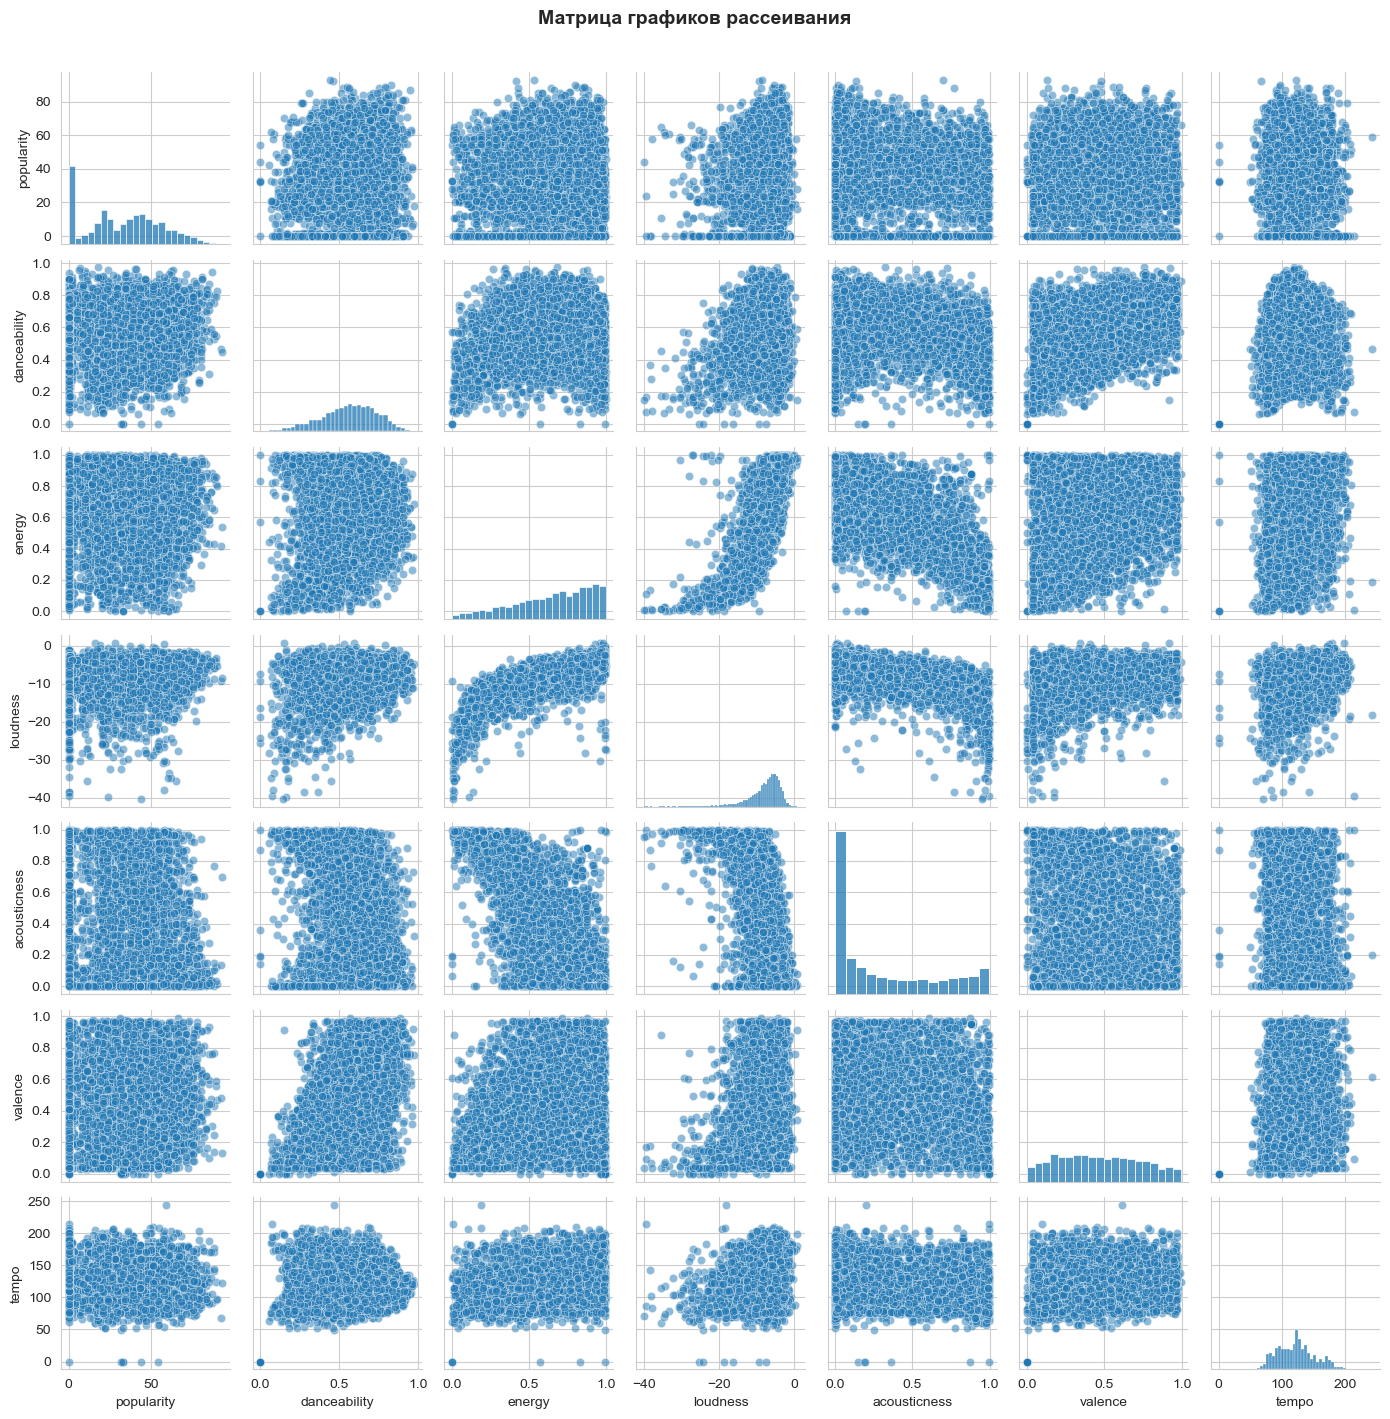

In [49]:
key_features = ['popularity', 'danceability', 'energy', 'loudness', 
                'acousticness', 'valence', 'tempo']

sample_size = min(5000, len(df))
df_sample = df[key_features].sample(n=sample_size, random_state=42)

print(f"Построение pairplot для {len(key_features)} признаков (выборка: {sample_size} треков)...")
sns.pairplot(df_sample, diag_kind='hist', plot_kws={'alpha': 0.5}, height=2)
plt.suptitle("Матрица графиков рассеивания", y=1.01, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 4.4. Анализ полученных результатов

## Выводы

### 1. Общая характеристика датасета
Датасет содержит **114 000 треков** с **20 признаками**, описывающими акустические характеристики и метаданные композиций. Большинство признаков являются числовыми (17 из 20), что обеспечивает широкие возможности для количественного анализа.

### 2. Качество данных
В датасете обнаружено **3 пропущенных значения** (0.003% от всех данных):
- `artists` — 1 пропуск
- `album_name` — 1 пропуск  
- `track_name` — 1 пропуск

**Предложена стратегия обработки:** заполнение пропусков значением "Unknown" для сохранения максимального объема данных (см. раздел 3.4).

### 3. Выбросы
Обнаружено **значительное количество выбросов** во многих числовых признаках (по методу IQR):
- `instrumentalness` — 25 246 выбросов (22.15%) — инструментальные треки без вокала
- `speechiness` — 13 211 выбросов (11.59%) — треки с повышенным содержанием речи
- `time_signature` — 12 157 выбросов (10.66%) — необычные размеры такта
- `liveness` — 8 642 выброса (7.58%) — концертные записи
- `loudness` — 6 173 выброса (5.41%) — очень тихие треки
- `duration_ms` — 5 617 выбросов (4.93%) — очень длинные треки (максимум ≈ 85 минут)
- `tempo` — 617 выбросов (0.54%) — экстремально медленные или быстрые треки
- `danceability` — 620 выбросов (0.54%) — треки с низкой танцевальностью

**Рекомендация:** Сохранить выбросы, так как они отражают реальное разнообразие музыкальных композиций (концертные записи, инструментальные треки, подкасты, нестандартные жанры) и не являются ошибками измерения.

### 4. Корреляции между признаками
Выявлены **2 пары признаков с сильной корреляцией** (|r| ≥ 0.7):
- `energy` ↔ `loudness`: r = 0.77 (сильная положительная)
- `energy` ↔ `acousticness`: r = -0.73 (сильная отрицательная)

**Интерпретация:**
- Более энергичные треки, как правило, громче
- Акустические композиции имеют меньше энергии
- Остальные признаки имеют слабые или умеренные корреляции, что указывает на их относительную независимость

### 5. Итоговая оценка датасета
Датасет **пригоден для дальнейшего анализа** с минимальными предварительными преобразованиями:
- Высокое качество данных (99.997% полноты)
- Достаточный объем для статистического анализа
- Разнообразие признаков для построения моделей
- Требуется обработка 3 пропущенных значений
- Выбросы целесообразно сохранить как часть естественного распределения данных